In [ ]:
import zipfile
import os
import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.utils as ku

In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Btraining_normal.zip

--2022-06-14 14:50:47--  http://www.peterjbentley.com/heartchallenge/wav/Btraining_normal.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13761027 (13M) [application/zip]
Saving to: ‘Btraining_normal.zip’

Btraining_normal.zi 100%[===================>]  13.12M   582KB/s    in 16s     

2022-06-14 14:51:03 (866 KB/s) - ‘Btraining_normal.zip’ saved [13761027/13761027]



In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Btraining_murmur.zip

--2022-06-14 14:51:03--  http://www.peterjbentley.com/heartchallenge/wav/Btraining_murmur.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5347795 (5.1M) [application/zip]
Saving to: ‘Btraining_murmur.zip’

Btraining_murmur.zi 100%[===================>]   5.10M   423KB/s    in 12s     

2022-06-14 14:51:15 (446 KB/s) - ‘Btraining_murmur.zip’ saved [5347795/5347795]



In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Btraining_extrasystole.zip

--2022-06-14 14:51:15--  http://www.peterjbentley.com/heartchallenge/wav/Btraining_extrasystole.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1892466 (1.8M) [application/zip]
Saving to: ‘Btraining_extrasystole.zip’

Btraining_extrasyst 100%[===================>]   1.80M   486KB/s    in 4.3s    

2022-06-14 14:51:20 (427 KB/s) - ‘Btraining_extrasystole.zip’ saved [1892466/1892466]



In [ ]:
!wget http://www.peterjbentley.com/heartchallenge/wav/Bunlabelledtest.zip

--2022-06-14 14:51:20--  http://www.peterjbentley.com/heartchallenge/wav/Bunlabelledtest.zip
Resolving www.peterjbentley.com (www.peterjbentley.com)... 209.151.22.160
Connecting to www.peterjbentley.com (www.peterjbentley.com)|209.151.22.160|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9181589 (8.8M) [application/zip]
Saving to: ‘Bunlabelledtest.zip’

Bunlabelledtest.zip 100%[===================>]   8.76M   426KB/s    in 19s     

2022-06-14 14:51:40 (466 KB/s) - ‘Bunlabelledtest.zip’ saved [9181589/9181589]



In [ ]:
if not os.path.exists('/content/SoundData'):

  _root_dir = '/content/SoundData'
  !mkdir {_root_dir}

  _train_dir = os.path.join(_root_dir, 'train')
  _test_dir = os.path.join(_root_dir, 'test')
  !mkdir {_train_dir}
  !mkdir {_test_dir}

  with zipfile.ZipFile('/content/Btraining_extrasystole.zip', 'r') as zip_ref:
    zip_ref.extractall(_train_dir)
  
  with zipfile.ZipFile('/content/Btraining_murmur.zip', 'r') as zip_ref:
    zip_ref.extractall(_train_dir)
  
  with zipfile.ZipFile('/content/Btraining_normal.zip', 'r') as zip_ref:
    zip_ref.extractall(_train_dir)

  with zipfile.ZipFile('/content/Bunlabelledtest.zip', 'r') as zip_ref:
    zip_ref.extractall(_test_dir)

  print('Files created successfully')
  
else:
  print('Files already exists!')

Files created successfully


In [ ]:
extrasystole_list = glob.glob('/content/SoundData/train/Btraining_extrastole/*')

murmur_list = glob.glob('/content/SoundData/train/Btraining_murmur/*')
murmur_list.remove('/content/SoundData/train/Btraining_murmur/Btraining_noisymurmur')
noisy_murmur_list = glob.glob('/content/SoundData/train/Btraining_murmur/Btraining_noisymurmur/*')
murmur_list += noisy_murmur_list

normal_list = glob.glob('/content/SoundData/train/Training B Normal/*')
normal_list.remove('/content/SoundData/train/Training B Normal/Btraining_noisynormal')
noisy_normal_list = glob.glob('/content/SoundData/train/Training B Normal/Btraining_noisynormal/*')
normal_list += noisy_murmur_list

In [ ]:
extrasystole_samples = []
for i in tqdm(extrasystole_list):
  audio, _ = tf.audio.decode_wav(tf.io.read_file(i), desired_channels=1)
  extrasystole_samples.append(audio)

max_len = 4000#max([len(i) for i in extrasystole_samples])
extrasystole_samples = tf.convert_to_tensor(pad_sequences(extrasystole_samples, maxlen=max_len, padding='pre', dtype='float32'))

  0%|          | 0/46 [00:00<?, ?it/s]

In [ ]:
murmur_samples = []
for i in tqdm(murmur_list):
  audio, _ = tf.audio.decode_wav(tf.io.read_file(i), desired_channels=1)
  murmur_samples.append(audio)

max_len = 4000#max([len(i) for i in extrasystole_samples])
murmur_samples = tf.convert_to_tensor(pad_sequences(murmur_samples, maxlen=max_len, padding='pre', dtype='float32'))

  0%|          | 0/95 [00:00<?, ?it/s]

In [ ]:
normal_samples = []
for i in tqdm(normal_list):
  audio, _ = tf.audio.decode_wav(tf.io.read_file(i), desired_channels=1)
  normal_samples.append(audio)

max_len = 4000#max([len(i) for i in extrasystole_samples])
normal_samples = tf.convert_to_tensor(pad_sequences(normal_samples, maxlen=max_len, padding='pre', dtype='float32'))

  0%|          | 0/229 [00:00<?, ?it/s]

In [ ]:
X = tf.concat([extrasystole_samples, murmur_samples, normal_samples], axis=0)
y = np.zeros((X.shape[0], ), dtype='int32')
y[len(extrasystole_samples):len(extrasystole_samples) + len(murmur_samples)] = 1
y[len(extrasystole_samples) + len(murmur_samples):] = 2
y = tf.convert_to_tensor(y, dtype='int32')
X.shape
y.shape

TensorShape([370])

[(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


<BarContainer object of 3 artists>

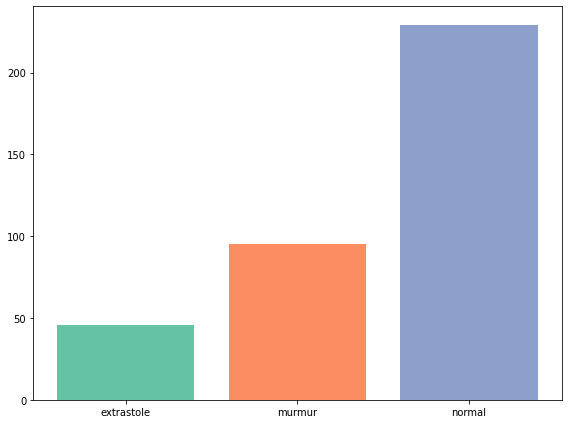

In [ ]:
colors = sns.color_palette('Set2')
print(colors)
plt.figure(figsize=(8,6), tight_layout=True)
plt.bar(['extrastole', 'murmur', 'normal'], 
        [np.unique(y, return_counts=True)[1][0], np.unique(y, return_counts=True)[1][1], np.unique(y, return_counts=True)[1][2]], color=colors[0:3])

In [ ]:
np.unique(y, return_counts=True)[1][2] / (np.unique(y, return_counts=True)[1][0]+np.unique(y, return_counts=True)[1][1]+np.unique(y, return_counts=True)[1][2])

0.6189189189189189

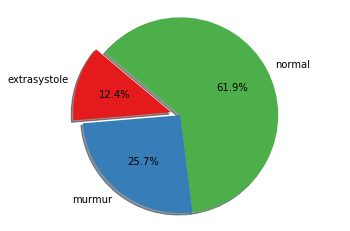

In [ ]:
colors = sns.color_palette('Set1')
labels = ['extrasystole', 'murmur', 'normal']
sizes = [np.unique(y, return_counts=True)[1][0], np.unique(y, return_counts=True)[1][1], np.unique(y, return_counts=True)[1][2]]
explode = (0.1, 0, 0)
# Plot
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140, colors=colors, explode=explode)
plt.axis('equal')
plt.show()

In [ ]:
weight_for_0 = (1 / np.unique(y, return_counts=True)[1][0]) * (len(y) / 3.0)
weight_for_1 = (1 / np.unique(y, return_counts=True)[1][1]) * (len(y) / 3.0)
weight_for_2 = (1 / np.unique(y, return_counts=True)[1][2]) * (len(y) / 3.0)

class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weights

{0: 2.681159420289855, 1: 1.2982456140350875, 2: 0.5385735080058224}

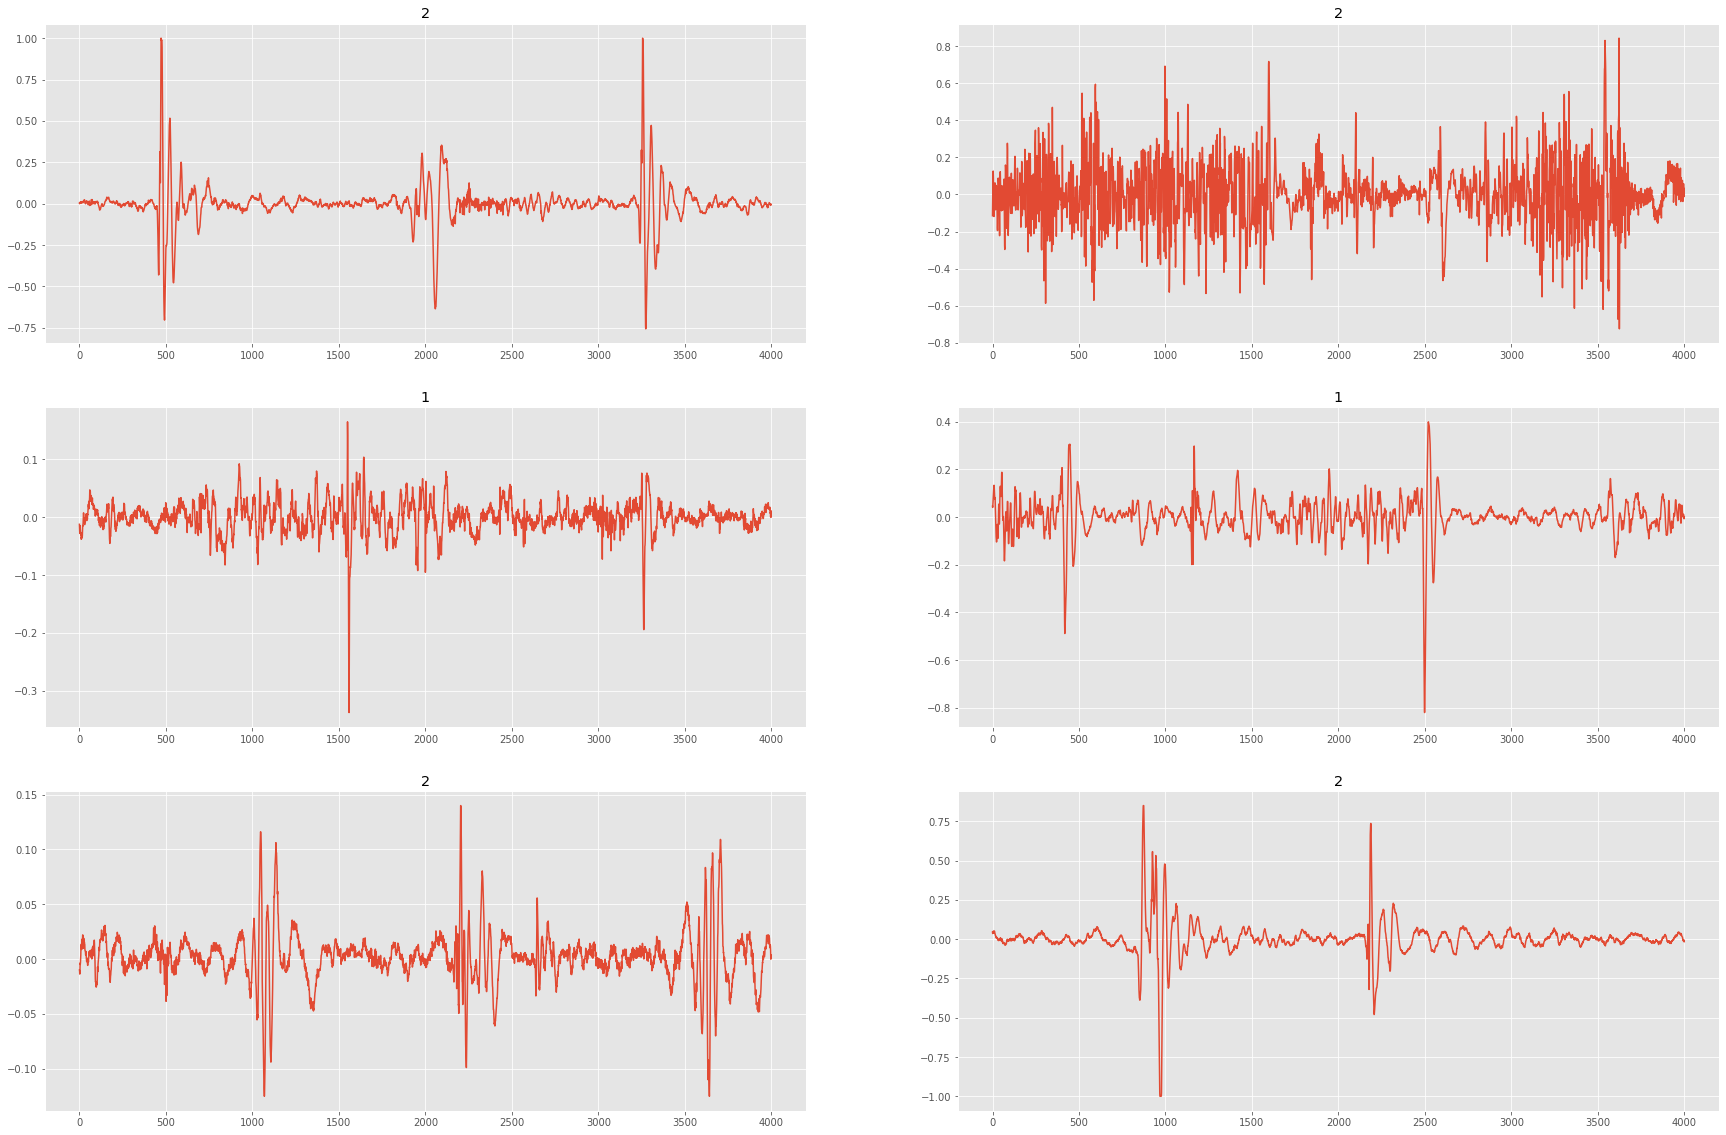

In [ ]:
style.use('ggplot')
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
rand_sample = np.random.randint(0, len(X), 6)
counter = 0
for i in range(3):
  for j in range(2):
    axes[i][j].plot(np.arange(len(X[rand_sample[counter]])), X[rand_sample[counter]])
    axes[i][j].set_title(f'{y[rand_sample[counter]]}')
    counter += 1

In [ ]:
def train_test_split(X, y, test_split_size=0.2):
  rand_row_num = np.random.randint(0, len(y), int(len(y) * test_split_size))

  X_val = np.array([X[i] for i in rand_row_num])
  X_train = np.delete(X, rand_row_num, axis=0)

  y_val = np.array([y[i] for i in rand_row_num])
  y_train = np.delete(y, rand_row_num, axis=0)

  return X_train, y_train, X_val, y_val

X_train, y_train, X_val, y_val = train_test_split(X, y)

In [ ]:
def input_pipeline(X, y, shuffle_buffer, batch_size):
  X = tf.expand_dims(X, -1)
  y = ku.to_categorical(y, num_classes=3)
  ds = tf.data.Dataset.from_tensor_slices((X, y))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.batch(batch_size)
  return ds.prefetch(1)

ds_train = input_pipeline(X_train, y_train, 1000, 8)
ds_val = input_pipeline(X_val, y_val, 1000, 8)

In [ ]:
def build_model(max_len):
  inputs = layers.Input((max_len, 1))
  x = layers.Conv1D(64, 5, activation='relu')(inputs)
  x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
  x = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(x)
  x = layers.LSTM(32)(x)
  x = layers.Dropout(0.3)(x)
  x = layers.Dense(128, activation='relu')(x)
  outputs = layers.Dense(3, activation='softmax')(x)

  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

  return model

In [ ]:
model = build_model(max_len)
print(model.summary())

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=METRICS)

history = model.fit(ds_train, epochs=7, validation_data=ds_val, class_weight=class_weights)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 3996, 64)          384       
                                                                 
 bidirectional (Bidirectiona  (None, 3996, 64)         24832     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 3996, 64)         24832     
 nal)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0     

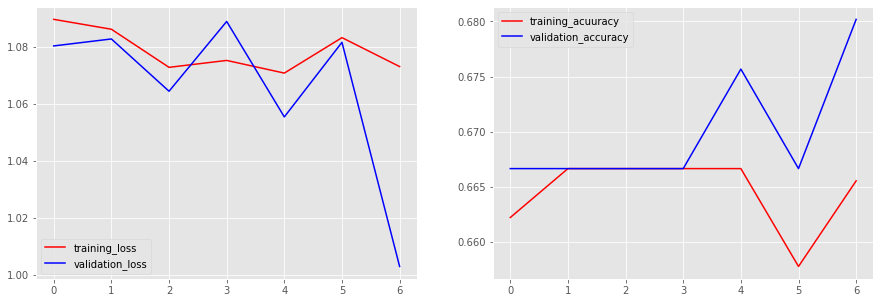

In [ ]:
epochs = np.arange(len(history.history['loss']))
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(epochs, history.history['loss'], color='r', label='training_loss')
axes[0].plot(epochs, history.history['val_loss'], color='b', label='validation_loss')
axes[0].legend()

axes[1].plot(epochs, history.history['accuracy'], color='r', label='training_acuuracy')
axes[1].plot(epochs, history.history['val_accuracy'], color='b', label='validation_accuracy')
axes[1].legend()

plt.show()